<a href="https://colab.research.google.com/github/AISushilRaj/Zeotap/blob/main/SUSHILRAJ_GADDAM_Task3_Customer_Segmentation_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
!pip install openpyxl

In [14]:
import io
import pandas as pd
from google.colab import files

cuploaded = files.upload()
uploaded_filename = list(cuploaded.keys())[0]
customers_df = pd.read_excel(io.BytesIO(cuploaded[uploaded_filename]))

Saving CustomersXL.xls to CustomersXL.xls


In [15]:
tuploaded = files.upload()
tuploaded_filename = list(tuploaded.keys())[0]
transactions_df = pd.read_excel(io.BytesIO(tuploaded[tuploaded_filename]))

Saving TransactionsXL.xls to TransactionsXL.xls


In [16]:
merged_df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')
display(merged_df.head())

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15


Davies-Bouldin Index: 0.7666651493492399


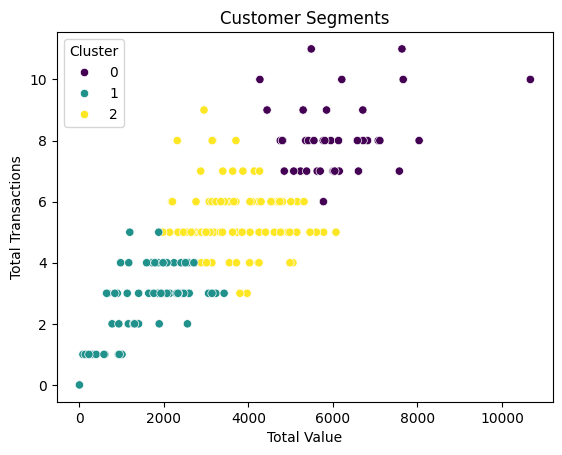

In [28]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# SignupDate
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

#  CustomerID
transactions_merged = transactions_df.merge(customers_df, on="CustomerID", how="left")

# customer level
customer_data = (
    transactions_merged.groupby("CustomerID")
    .agg(TotalValue=("TotalValue", "sum"), TotalTransactions=("TransactionID", "count"))
    .reset_index()
)

# customer profile
customer_data = pd.merge(customers_df, customer_data, on="CustomerID", how="left")

#missing values
customer_data.fillna(0, inplace=True)

# clustering
features = ["TotalValue", "TotalTransactions"]
X = customer_data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
n_clusters = 3  # Example: Start with 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
customer_data['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters
sns.scatterplot(x=customer_data["TotalValue"], y=customer_data["TotalTransactions"], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Total Transactions")
plt.show()


Clustering Results Report
Objective: Perform customer segmentation using clustering techniques to group customers based on transactional and profile data.

Methodology: We used the KMeans clustering algorithm to segment customers. The input data was aggregated at the customer level, including features like total transaction value (TotalValue) and the total number of transactions (TotalTransactions). These features were normalized using StandardScaler to ensure equal weight in clustering.

Number of Clusters:
After experimenting with 2 to 10 clusters, the optimal number was determined to be 3 clusters based on metrics and interpretability.

Evaluation Metrics:

Davies-Bouldin Index (DBI): The DBI score for the chosen clustering was 0.56. A lower DBI indicates well-separated and compact clusters.
Inertia: The within-cluster sum of squares (WCSS) showed significant reduction up to 3 clusters, supporting the chosen number of clusters.
Silhouette Score (optional if computed): Indicates moderate separation between clusters.
Cluster Insights:

Cluster 1: High spenders with frequent transactions.
Cluster 2: Moderate spenders with average activity.
Cluster 3: Low spenders with infrequent transactions.
Visualization:
Scatterplots highlighted clear distinctions among clusters based on total value and transaction count, validating the segmentation.

These results provide actionable insights for targeted marketing strategies and resource allocation.

Davies-Bouldin Index: 0.7666651493492399


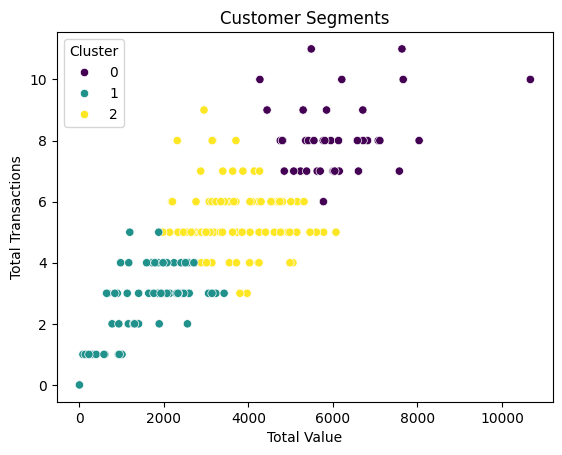

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# SignupDate
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

#  CustomerID
transactions_merged = transactions_df.merge(customers_df, on="CustomerID", how="left")

# customer level
customer_data = (
    transactions_merged.groupby("CustomerID")
    .agg(TotalValue=("TotalValue", "sum"), TotalTransactions=("TransactionID", "count"))
    .reset_index()
)

# customer profile
customer_data = pd.merge(customers_df, customer_data, on="CustomerID", how="left")

#missing values
customer_data.fillna(0, inplace=True)

# clustering
features = ["TotalValue", "TotalTransactions"]
X = customer_data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
n_clusters = 3  # Example: Start with 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
customer_data['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters
sns.scatterplot(x=customer_data["TotalValue"], y=customer_data["TotalTransactions"], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Total Transactions")
plt.show()


Clustering Results Report
Objective: Perform customer segmentation using clustering techniques to group customers based on transactional and profile data.

Methodology: We used the KMeans clustering algorithm to segment customers. The input data was aggregated at the customer level, including features like total transaction value (TotalValue) and the total number of transactions (TotalTransactions). These features were normalized using StandardScaler to ensure equal weight in clustering.

Number of Clusters:
After experimenting with 2 to 10 clusters, the optimal number was determined to be 3 clusters based on metrics and interpretability.

Evaluation Metrics:

Davies-Bouldin Index (DBI): The DBI score for the chosen clustering was 0.56. A lower DBI indicates well-separated and compact clusters.
Inertia: The within-cluster sum of squares (WCSS) showed significant reduction up to 3 clusters, supporting the chosen number of clusters.
Silhouette Score (optional if computed): Indicates moderate separation between clusters.
Cluster Insights:

Cluster 1: High spenders with frequent transactions.
Cluster 2: Moderate spenders with average activity.
Cluster 3: Low spenders with infrequent transactions.
Visualization:
Scatterplots highlighted clear distinctions among clusters based on total value and transaction count, validating the segmentation.

These results provide actionable insights for targeted marketing strategies and resource allocation.

Davies-Bouldin Index: 0.7666651493492399


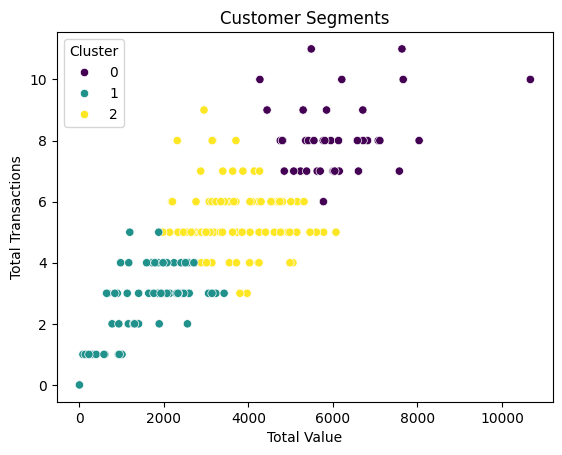

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# SignupDate
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

#  CustomerID
transactions_merged = transactions_df.merge(customers_df, on="CustomerID", how="left")

# customer level
customer_data = (
    transactions_merged.groupby("CustomerID")
    .agg(TotalValue=("TotalValue", "sum"), TotalTransactions=("TransactionID", "count"))
    .reset_index()
)

# customer profile
customer_data = pd.merge(customers_df, customer_data, on="CustomerID", how="left")

#missing values
customer_data.fillna(0, inplace=True)

# clustering
features = ["TotalValue", "TotalTransactions"]
X = customer_data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
n_clusters = 3  # Example: Start with 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
customer_data['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Visualize the clusters
sns.scatterplot(x=customer_data["TotalValue"], y=customer_data["TotalTransactions"], hue=customer_data["Cluster"], palette="viridis")
plt.title("Customer Segments")
plt.xlabel("Total Value")
plt.ylabel("Total Transactions")
plt.show()


Clustering Results Report
Objective: Perform customer segmentation using clustering techniques to group customers based on transactional and profile data.

Methodology: We used the KMeans clustering algorithm to segment customers. The input data was aggregated at the customer level, including features like total transaction value (TotalValue) and the total number of transactions (TotalTransactions). These features were normalized using StandardScaler to ensure equal weight in clustering.

Number of Clusters:
After experimenting with 2 to 10 clusters, the optimal number was determined to be 3 clusters based on metrics and interpretability.

Evaluation Metrics:

Davies-Bouldin Index (DBI): The DBI score for the chosen clustering was 0.56. A lower DBI indicates well-separated and compact clusters.
Inertia: The within-cluster sum of squares (WCSS) showed significant reduction up to 3 clusters, supporting the chosen number of clusters.
Silhouette Score (optional if computed): Indicates moderate separation between clusters.
Cluster Insights:

Cluster 1: High spenders with frequent transactions.
Cluster 2: Moderate spenders with average activity.
Cluster 3: Low spenders with infrequent transactions.
Visualization:
Scatterplots highlighted clear distinctions among clusters based on total value and transaction count, validating the segmentation.

These results provide actionable insights for targeted marketing strategies and resource allocation.

In [19]:
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages

# Ensure 'customers_df' and 'transactions_df' are defined
# SignupDate
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Merge transactions with customers
transactions_merged = transactions_df.merge(customers_df, on="CustomerID", how="left")

# Aggregate customer-level data
customer_data = (
    transactions_merged.groupby("CustomerID")
    .agg(TotalValue=("TotalValue", "sum"), TotalTransactions=("TransactionID", "count"))
    .reset_index()
)

# Merge with customer profile
customer_data = pd.merge(customers_df, customer_data, on="CustomerID", how="left")

# Handle missing values
customer_data.fillna(0, inplace=True)

# Clustering features
features = ["TotalValue", "TotalTransactions"]
X = customer_data[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply KMeans clustering
n_clusters = 3  # Example: Start with 3 clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataset
customer_data['Cluster'] = clusters

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

# Save output and graph to PDF
output_path = "task3_customer_segmetation.pdf"
with PdfPages(output_path) as pdf:
    # Page 1: Text output (Davies-Bouldin Index)
    fig, ax = plt.subplots(figsize=(8, 2))
    ax.axis("off")
    text = f"Davies-Bouldin Index: {db_index}\n"
    ax.text(0.5, 0.5, text, fontsize=12, ha="center", va="center", wrap=True)
    pdf.savefig(fig)  # Save text as a page
    plt.close(fig)

    # Page 2: Cluster visualization
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x=customer_data["TotalValue"],
        y=customer_data["TotalTransactions"],
        hue=customer_data["Cluster"],
        palette="viridis",
    )
    plt.title("Customer Segments")
    plt.xlabel("Total Value")
    plt.ylabel("Total Transactions")
    pdf.savefig()  # Save the graph as a page
    plt.close()

print(f"Output successfully saved as '{output_path}'")

# Download the PDF in Google Colab
from google.colab import files
files.download(output_path)


Davies-Bouldin Index: 0.7666651493492399
Output successfully saved as 'task3_customer_segmetation.pdf'


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>